# DATA MANIPULATION AND EDA WITH PYTHON

In [35]:
#importing required libraries for analysis 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from sqlalchemy import create_engine
import urllib

In [36]:
#reading the files into dataframe variables from csv files. 
orders_df = pd.read_csv(r"C:\Users\Ravik\Desktop\adventure works project\aw_orders.csv")
products_df = pd.read_csv(r"C:\Users\Ravik\Desktop\adventure works project\aw_products.csv")
customers_df = pd.read_csv(r"C:\Users\Ravik\Desktop\adventure works project\aw_customers.csv")

#Getting an idea of orders_df table about how the data looks like, using head() method. 
orders_df.head()

,SalesOrderID,CustomerID,OrderDate,OrderQuantity,ProductID,UnitPrice,LineTotal
0,43659,29825,31-05-2011,1,776,2024.994,2024.994
1,43659,29825,31-05-2011,3,777,2024.994,6074.982
2,43659,29825,31-05-2011,1,778,2024.994,2024.994
3,43659,29825,31-05-2011,1,771,2039.994,2039.994
4,43659,29825,31-05-2011,1,772,2039.994,2039.994


In [37]:
#Getting an idea of products_df table about how the data looks like, using head() method. 
products_df.head()

,ProductID,ProductName,ProductNumber,CategoryName,SubcategoryName,ProductModel,ListPrice
0,680,"HL Road Frame - Black, 58",FR-R92B-58,Components,Road Frames,HL Road Frame,1431.50
1,706,"HL Road Frame - Red, 58",FR-R92R-58,Components,Road Frames,HL Road Frame,1431.50
2,707,"Sport-100 Helmet, Red",HL-U509-R,Accessories,Helmets,Sport-100,34.99
3,708,"Sport-100 Helmet, Black",HL-U509,Accessories,Helmets,Sport-100,34.99
4,709,"Mountain Bike Socks, M",SO-B909-M,Clothing,Socks,Mountain Bike Socks,9.50


In [38]:
#Getting an idea of customers_df table about how the data looks like, using head() method. 
customers_df.head()

,CustomerID,FullName,City,Country
0,18504,Angel Adams,Burlingame,United States
1,13280,Bailey Adams,Kirkland,United States
2,18075,Courtney C Adams,Torrance,United States
3,25292,Eduardo A Adams,San Diego,United States
4,12154,Hailey M Adams,Westminster,Canada


### Data Manipulation of customers_df dataframe

In [39]:
#knowing the shape (count of rows, columns) and knowing the non-null count, column datatypes in dataframe of customers_df
print(customers_df.shape)

customers_df.info()

(18508, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18508 entries, 0 to 18507
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CustomerID  18508 non-null  int64 
 1   FullName    18508 non-null  object
 2   City        18508 non-null  object
 3   Country     18508 non-null  object
dtypes: int64(1), object(3)
memory usage: 578.5+ KB


In [40]:
#fixing column names of customers_df dataframe by trimming white spaces and converting text into lower case. 
customers_df.columns = customers_df.columns.str.strip().str.lower() 

In [41]:
#converting customerid's datatype from int to object. 
customers_df['customerid'] = customers_df['customerid'].astype(object)

In [42]:
#checking if everything is fine or not. 
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18508 entries, 0 to 18507
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerid  18508 non-null  object
 1   fullname    18508 non-null  object
 2   city        18508 non-null  object
 3   country     18508 non-null  object
dtypes: object(4)
memory usage: 578.5+ KB


In [43]:
customers_df.head()

,customerid,fullname,city,country
0,18504,Angel Adams,Burlingame,United States
1,13280,Bailey Adams,Kirkland,United States
2,18075,Courtney C Adams,Torrance,United States
3,25292,Eduardo A Adams,San Diego,United States
4,12154,Hailey M Adams,Westminster,Canada


In [44]:
customers_df['customerid'].duplicated().sum()

np.int64(24)

In [45]:
customers_df.drop_duplicates(subset='customerid', inplace=True)

customers_df['customerid'].duplicated().sum()

np.int64(0)

In [46]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18484 entries, 0 to 18507
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerid  18484 non-null  object
 1   fullname    18484 non-null  object
 2   city        18484 non-null  object
 3   country     18484 non-null  object
dtypes: object(4)
memory usage: 722.0+ KB


### Data Manipulation of pproducts_df dataframe

In [47]:
#knowing the shape (count of rows, columns) and knowing the non-null count, column datatypes in dataframe of products_df
print(products_df.shape)
products_df.info()

(295, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295 entries, 0 to 294
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ProductID        295 non-null    int64  
 1   ProductName      295 non-null    object 
 2   ProductNumber    295 non-null    object 
 3   CategoryName     295 non-null    object 
 4   SubcategoryName  295 non-null    object 
 5   ProductModel     295 non-null    object 
 6   ListPrice        295 non-null    float64
dtypes: float64(1), int64(1), object(5)
memory usage: 16.3+ KB


In [48]:
#fixing column names of products_df dataframe by trimming white spaces and converting text into lower case. 
products_df.columns = products_df.columns.str.strip().str.lower()
products_df.columns

Index(['productid', 'productname', 'productnumber', 'categoryname',
       'subcategoryname', 'productmodel', 'listprice'],
      dtype='object')

In [49]:
#converting productid column to object datatype which was int earlier. 
products_df['productid'] = products_df['productid'].astype(object)
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295 entries, 0 to 294
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   productid        295 non-null    object 
 1   productname      295 non-null    object 
 2   productnumber    295 non-null    object 
 3   categoryname     295 non-null    object 
 4   subcategoryname  295 non-null    object 
 5   productmodel     295 non-null    object 
 6   listprice        295 non-null    float64
dtypes: float64(1), object(6)
memory usage: 16.3+ KB


In [50]:
#checking for duplicates in dataframe but unfortunately, found none. 
products_df.duplicated().sum()

np.int64(0)

In [51]:
products_df['productid'].duplicated().sum()

np.int64(0)

### Data Manipulation of orders_df dataframe

In [52]:
#knowing the shape (count of rows, columns) and knowing the non-null count, column datatypes in dataframe of orders_df

print(orders_df.shape)
orders_df.info()

(121317, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121317 entries, 0 to 121316
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   SalesOrderID   121317 non-null  int64  
 1   CustomerID     121317 non-null  int64  
 2   OrderDate      121317 non-null  object 
 3   OrderQuantity  121317 non-null  int64  
 4   ProductID      121317 non-null  int64  
 5   UnitPrice      121317 non-null  float64
 6   LineTotal      121317 non-null  float64
dtypes: float64(2), int64(4), object(1)
memory usage: 6.5+ MB


In [53]:
#fixing column names of orders_df dataframe by trimming white spaces and converting text into lower case. 

orders_df.columns = orders_df.columns.str.strip().str.lower()
orders_df.columns

Index(['salesorderid', 'customerid', 'orderdate', 'orderquantity', 'productid',
       'unitprice', 'linetotal'],
      dtype='object')

In [54]:
#fixing datatypes of below 3 columns which are supposed to be of an object type. 
for i in ['salesorderid', 'customerid', 'productid']:
    orders_df[i] = orders_df[i].astype(object)

orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121317 entries, 0 to 121316
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   salesorderid   121317 non-null  object 
 1   customerid     121317 non-null  object 
 2   orderdate      121317 non-null  object 
 3   orderquantity  121317 non-null  int64  
 4   productid      121317 non-null  object 
 5   unitprice      121317 non-null  float64
 6   linetotal      121317 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.5+ MB


In [55]:
#fixing datatype of orderdate column to datetime datatype
orders_df['orderdate'] = pd.to_datetime(orders_df['orderdate'], format= '%d-%m-%Y')
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121317 entries, 0 to 121316
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   salesorderid   121317 non-null  object        
 1   customerid     121317 non-null  object        
 2   orderdate      121317 non-null  datetime64[ns]
 3   orderquantity  121317 non-null  int64         
 4   productid      121317 non-null  object        
 5   unitprice      121317 non-null  float64       
 6   linetotal      121317 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.5+ MB


In [56]:
#checking the cleaning dataframe
orders_df.head()

,salesorderid,customerid,orderdate,orderquantity,productid,unitprice,linetotal
0,43659,29825,2011-05-31,1,776,2024.994,2024.994
1,43659,29825,2011-05-31,3,777,2024.994,6074.982
2,43659,29825,2011-05-31,1,778,2024.994,2024.994
3,43659,29825,2011-05-31,1,771,2039.994,2039.994
4,43659,29825,2011-05-31,1,772,2039.994,2039.994


In [57]:
#checking if there are any duplicates. Found none. 
orders_df.duplicated().sum()

np.int64(0)

In [58]:
orders_df.shape

(121317, 7)

In [59]:
# Keep only those customers whose customerid exists in orders_df
orders_df = orders_df[orders_df['customerid'].isin(customers_df['customerid'])]

orders_df.shape

(60398, 7)

### Exploratory Data Analysis

In [60]:
#printing the shapes of three dataframes. 
print("orders_df shape is : ", orders_df.shape)
print("products_df shape is : ", products_df.shape)
print("customers_df shape is : ", customers_df.shape)

orders_df shape is :  (60398, 7)
products_df shape is :  (295, 7)
customers_df shape is :  (18484, 4)


In [61]:
#Saving these cleaned dataframes as csv files 
orders_df.to_csv(r'C:\Users\Ravik\Desktop\adventure works project\orders.csv', index=False)
products_df.to_csv(r'C:\Users\Ravik\Desktop\adventure works project\products.csv', index=False)
customers_df.to_csv(r'C:\Users\Ravik\Desktop\adventure works project\customers.csv', index=False)

In [62]:
#want to create a Main Dataframe named df by merging all the three dataframes using common columns
#Merging orders_df and products_df based on productid column using left join and saving the output dataframe to df. 
df = pd.merge(left= orders_df, right= products_df, on= 'productid', how= 'left')
df.head()

,salesorderid,customerid,orderdate,orderquantity,productid,unitprice,linetotal,productname,productnumber,categoryname,subcategoryname,productmodel,listprice
0,43697,21768,2011-05-31,1,749,3578.2700,3578.2700,"Road-150 Red, 62",BK-R93R-62,Bikes,Road Bikes,Road-150,3578.27
1,43698,28389,2011-05-31,1,773,3399.9900,3399.9900,"Mountain-100 Silver, 44",BK-M82S-44,Bikes,Mountain Bikes,Mountain-100,3399.99
2,43699,25863,2011-05-31,1,773,3399.9900,3399.9900,"Mountain-100 Silver, 44",BK-M82S-44,Bikes,Mountain Bikes,Mountain-100,3399.99
3,43700,14501,2011-05-31,1,767,699.0982,699.0982,"Road-650 Black, 62",BK-R50B-62,Bikes,Road Bikes,Road-650,782.99
4,43701,11003,2011-05-31,1,773,3399.9900,3399.9900,"Mountain-100 Silver, 44",BK-M82S-44,Bikes,Mountain Bikes,Mountain-100,3399.99


In [63]:
#Merging df and customers_df based on customerid column and saving the output to df itself.
df = pd.merge(df, customers_df, on= 'customerid', how= 'left')
df.head()

,salesorderid,customerid,orderdate,orderquantity,productid,unitprice,linetotal,productname,productnumber,categoryname,subcategoryname,productmodel,listprice,fullname,city,country
0,43697,21768,2011-05-31,1,749,3578.2700,3578.2700,"Road-150 Red, 62",BK-R93R-62,Bikes,Road Bikes,Road-150,3578.27,Cole A Watson,Metchosin,Canada
1,43698,28389,2011-05-31,1,773,3399.9900,3399.9900,"Mountain-100 Silver, 44",BK-M82S-44,Bikes,Mountain Bikes,Mountain-100,3399.99,Rachael M Martinez,Pantin,France
2,43699,25863,2011-05-31,1,773,3399.9900,3399.9900,"Mountain-100 Silver, 44",BK-M82S-44,Bikes,Mountain Bikes,Mountain-100,3399.99,Sydney S Wright,Lebanon,United States
3,43700,14501,2011-05-31,1,767,699.0982,699.0982,"Road-650 Black, 62",BK-R50B-62,Bikes,Road Bikes,Road-650,782.99,Ruben Prasad,Beverly Hills,United States
4,43701,11003,2011-05-31,1,773,3399.9900,3399.9900,"Mountain-100 Silver, 44",BK-M82S-44,Bikes,Mountain Bikes,Mountain-100,3399.99,Christy Zhu,North Ryde,Australia


In [64]:
#Now I got a single dataframe (combination of three dataframes) for analysis. 
#Rechecking if everything is proper (datatypes, columnnames, null count). Found that there are nulls in this main dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60398 entries, 0 to 60397
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   salesorderid     60398 non-null  object        
 1   customerid       60398 non-null  object        
 2   orderdate        60398 non-null  datetime64[ns]
 3   orderquantity    60398 non-null  int64         
 4   productid        60398 non-null  object        
 5   unitprice        60398 non-null  float64       
 6   linetotal        60398 non-null  float64       
 7   productname      60398 non-null  object        
 8   productnumber    60398 non-null  object        
 9   categoryname     60398 non-null  object        
 10  subcategoryname  60398 non-null  object        
 11  productmodel     60398 non-null  object        
 12  listprice        60398 non-null  float64       
 13  fullname         60398 non-null  object        
 14  city             60398 non-null  objec

In [65]:
#Checking the null percentage of each column using isnull() and shape methods
#Found that there are more than 50% nulls in fullname, city and country columns
print("Null count percentage of each column with respect to total df: ")
np.round((df.isnull().sum() / df.shape[0]) * 100, 2)

Null count percentage of each column with respect to total df: 


salesorderid       0.0
customerid         0.0
orderdate          0.0
orderquantity      0.0
productid          0.0
unitprice          0.0
linetotal          0.0
productname        0.0
productnumber      0.0
categoryname       0.0
subcategoryname    0.0
productmodel       0.0
listprice          0.0
fullname           0.0
city               0.0
country            0.0
dtype: float64

In [66]:
#checking for duplicates, found none. 
df.duplicated().sum()

np.int64(0)

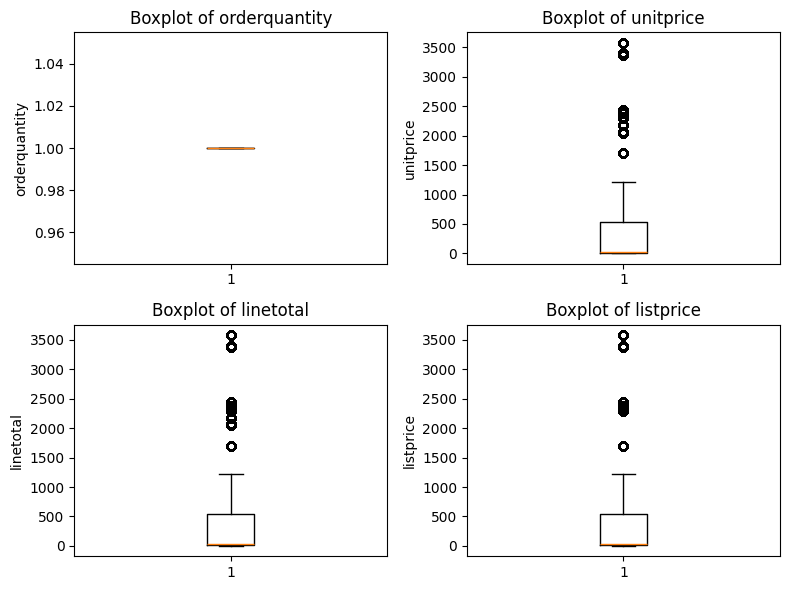

In [67]:
#finding outliers using boxplots for numerical columns 

numerical_cols = df.select_dtypes(include='number').columns
total_plots = len(numerical_cols)
ncols = 2
nrows = int(np.ceil(total_plots/ ncols))

fig, axs = plt.subplots(ncols= ncols, nrows= nrows, figsize = (ncols*4, nrows * 3))
axs = axs.flatten()

for i, col in enumerate(numerical_cols):
    axs[i].boxplot(df[col])
    axs[i].set_title(f'Boxplot of {col}')
    axs[i].set_ylabel(col)

for j in range(i+1, len(axs)): 
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

I want to treat outliers for these columns, but as this is an ecommerce domain, there could be huge variation in values

Example: Customer can buy 1 item of 1 lakh items at once, this may hugely affect orderquantity column

As all the other columns are interdependent on each other, their values will also get affected.

Hence, I have not made any treatment to fix outliers even though I am aware of the process using IQR method

In [68]:
#handling outliers 
'''for i in df.select_dtypes(include='number').columns:
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    IQR = q3 - q1
    lower_whisker = q1 - (IQR * 1.5)
    upper_whisker = q3 + (IQR * 1.5)
    df[i] = np.where(df[i] < lower_whisker, lower_whisker, df[i])
    df[i] = np.where(df[i] > upper_whisker, upper_whisker, df[i]) '''



"for i in df.select_dtypes(include='number').columns:\n    q1 = df[i].quantile(0.25)\n    q3 = df[i].quantile(0.75)\n    IQR = q3 - q1\n    lower_whisker = q1 - (IQR * 1.5)\n    upper_whisker = q3 + (IQR * 1.5)\n    df[i] = np.where(df[i] < lower_whisker, lower_whisker, df[i])\n    df[i] = np.where(df[i] > upper_whisker, upper_whisker, df[i]) "

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60398 entries, 0 to 60397
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   salesorderid     60398 non-null  object        
 1   customerid       60398 non-null  object        
 2   orderdate        60398 non-null  datetime64[ns]
 3   orderquantity    60398 non-null  int64         
 4   productid        60398 non-null  object        
 5   unitprice        60398 non-null  float64       
 6   linetotal        60398 non-null  float64       
 7   productname      60398 non-null  object        
 8   productnumber    60398 non-null  object        
 9   categoryname     60398 non-null  object        
 10  subcategoryname  60398 non-null  object        
 11  productmodel     60398 non-null  object        
 12  listprice        60398 non-null  float64       
 13  fullname         60398 non-null  object        
 14  city             60398 non-null  objec

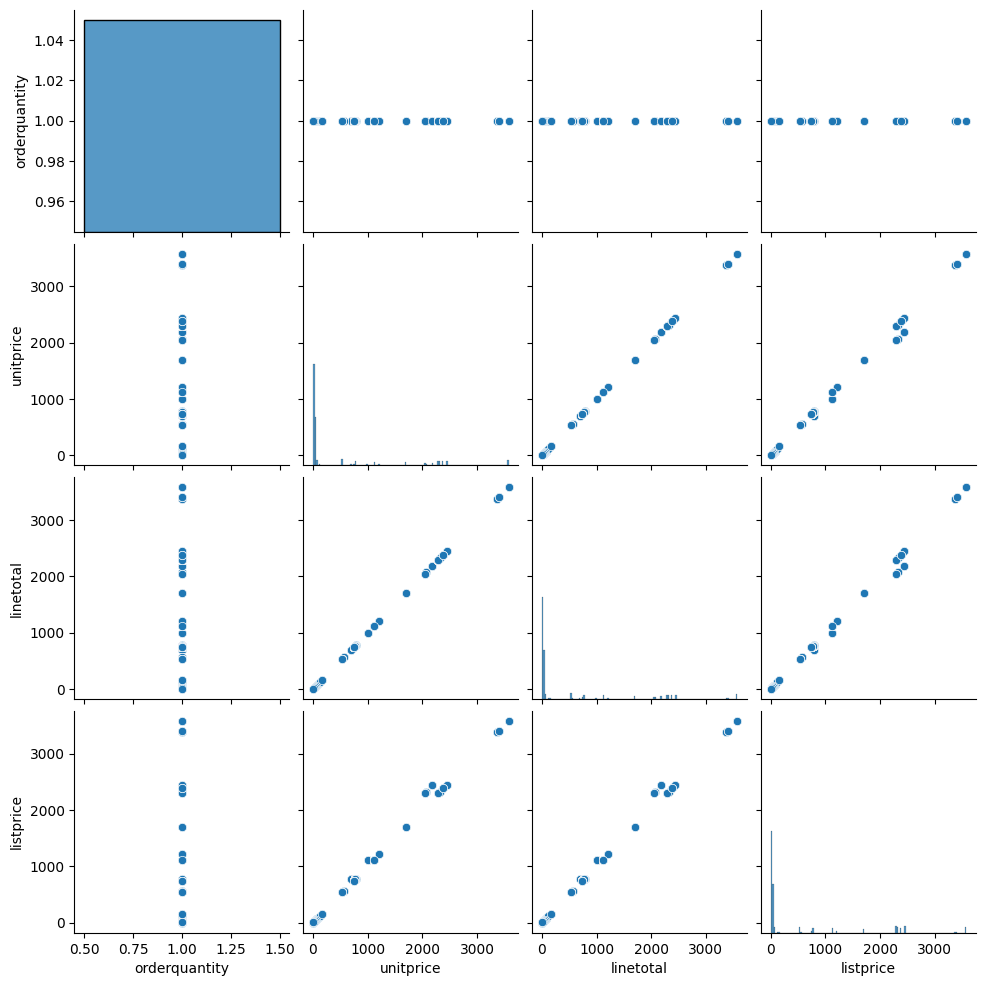

In [70]:
#plotting scatterplots usng pairplot method of sns. 
sns.pairplot(df[numerical_cols])
plt.show()

unitprice and linetotal are showing a positive trend and the linetotal is widely affected due to orderquantity

orderquantity and linetotal is also showing positive correlation with some clustering in at lower quantities

Text(0.5, 1.0, 'heatmap of numerical columns')

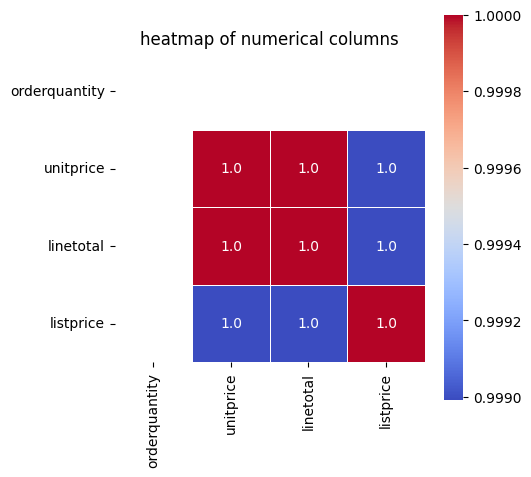

In [71]:
#heatmaps 
numeric_df = df.select_dtypes(include='number')
corr_matrix = numeric_df.corr()
plt.figure(figsize=(5,5))
sns.heatmap(corr_matrix, annot=True, cmap= 'coolwarm', fmt='0.1f', linewidths=0.5, square=True)
plt.title('heatmap of numerical columns')


In [72]:
#unitpirce - linetotal, unitprice - listprice are showing a positive correlation.
#As this dataset's numerical columns are limited, there isn't enough information to grab. 

### Pushing the cleaned dataframes into SQL SERVER

In [73]:
#Assigning the encoded connection string to the variable "params"
#Assiging SQLAlchemy engine object to the variable "engine"

params = urllib.parse.quote_plus(r"DRIVER={ODBC Driver 17 for SQL Server};"
                                 r"SERVER=RAVIKANTH\SQLEXPRESS;"
                                 r"DATABASE=adventureworks_cleaned;" 
                                 r"Trusted_Connection=yes;")

engine = create_engine(f"mssql+pyodbc:///?odbc_connect={params}")



In [74]:
#Saving the data in adventureworks_cleaned database in SQL Server with the table names as 'orders', 'products', 'customers'
orders_df.to_sql('orders', con=engine, index=False, if_exists='append')
products_df.to_sql('products', con=engine, index=False, if_exists='append')
customers_df.to_sql('customers', con=engine, index=False, if_exists='append')

144